In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [59]:
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import shap

In [12]:
# Setting our maximum column view to 11
pd.set_option('display.max_columns', 100)

In [13]:
# Setting params for plots
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [14]:
dataset = load_breast_cancer()
features = dataset.data
label = dataset.target

In [19]:
df = pd.DataFrame(features)

In [20]:
df.columns = dataset.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df['target'] = label

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


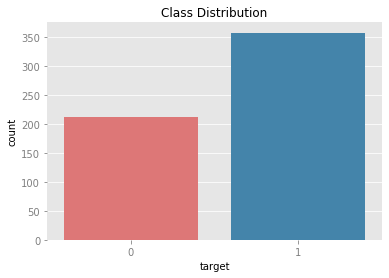

In [35]:
sns.countplot(x=df['target'])
plt.title('Class Distribution');

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42)

In [39]:
# Creating and fitting our dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Creating our y_pred variable
y_pred = dummy.predict(X_test)

# We need to one-hot encode our classes from our generated labels in order for
# The confusion matrix to be able to digest any of it
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.28      0.29        54
           1       0.59      0.62      0.60        89

    accuracy                           0.49       143
   macro avg       0.45      0.45      0.45       143
weighted avg       0.48      0.49      0.48       143



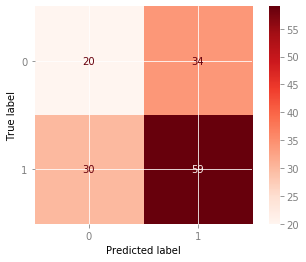

In [41]:
plot_confusion_matrix(dummy, X_test, y_test, normalize='true', cmap='Blues')

## Creating a GridSearch

In [60]:
# Creating our class weights dictionary
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), 
                                                  y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Our class weights:\n{class_weights_dict}")

Our class weights:
{0: 1.3481012658227849, 1: 0.7947761194029851}


### Defining hyperparameter choices

In [70]:
params = {'n_estimators': [10, 50, 100, 200], 
          'criterion': ['gini', 'entropy'], 
          'max_depth': [3, 5, 10, None], 
          'min_samples_leaf': [1, 2, 5, 10]}

In [71]:
forest = RandomForestClassifier(class_weight=class_weights_dict)

In [72]:
clf = GridSearchCV(estimator=forest, param_grid=params, scoring='recall', cv=10)

In [73]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight={0: 1.3481012658227849,
                                                            1: 0.7947761194029851}),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='recall')

In [74]:
best_params = clf.best_params_

In [75]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [76]:
best_forest = RandomForestClassifier(**best_params, class_weight=class_weights_dict)

In [77]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Definition:
    fits model on the training set and evaluates the model on the testing set.
    Prints out classification report along with a confusion matrix.
    
    Args:
    model: Required. A model to evaluate.
    X_train: Required. Features of the training set
    y_train: Required. Labels of the training set
    X_test: Required. Features of the testing set
    y_test: Required. Labels of the testing set
    
    Returns:
    A Classification report and confustion matrix of model evaluation on the test
    set.    
    """
    
    fit_model = model.fit(X_train, y_train)
    # creating y_pred values for train and test sets
    y_hat_test = fit_model.predict(X_test)
    y_hat_train = fit_model.predict(X_train)
    # comparing accuracy and recall score s of the train and test sets
    print(f"Train accuracy score: {metrics.accuracy_score(y_train, y_hat_train)}")
    print(f"Test accuracy score: {metrics.accuracy_score(y_test, y_hat_test)}")
    
    # printing out classification report and plotting confusion matrix
    print("Classification Report")
    print('---' * 8)
    classification_report(y_test, y_hat_test)
    plot_confusion_matrix(fit_model, X_test,y_test,normalize='true',cmap='Reds');
    
    ## Plot Roc Curve on second ax
#     plt.figure(figsize=(7, 7))
#     roc_plot = plot_roc_curve(fit_model, X_test, y_test)
#     plt.legend()
#     # Threshold line
#     plt.plot([0,1],[0,1],ls=':')
#     plt.title('ROC Curve')
#     plt.show()

Train accuracy score: 0.9953051643192489
Test accuracy score: 0.972027972027972
Classification Report
------------------------


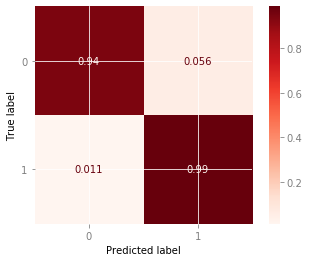

In [78]:
evaluate_model(best_forest, X_train, y_train, X_test, y_test)